In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [3]:
# remove Item_Identifier and Outlet_Identifier: no predictive value     
train_df = train_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
test_df = test_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [12]:
train_df.isnull().sum() / train_df.shape[0]*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

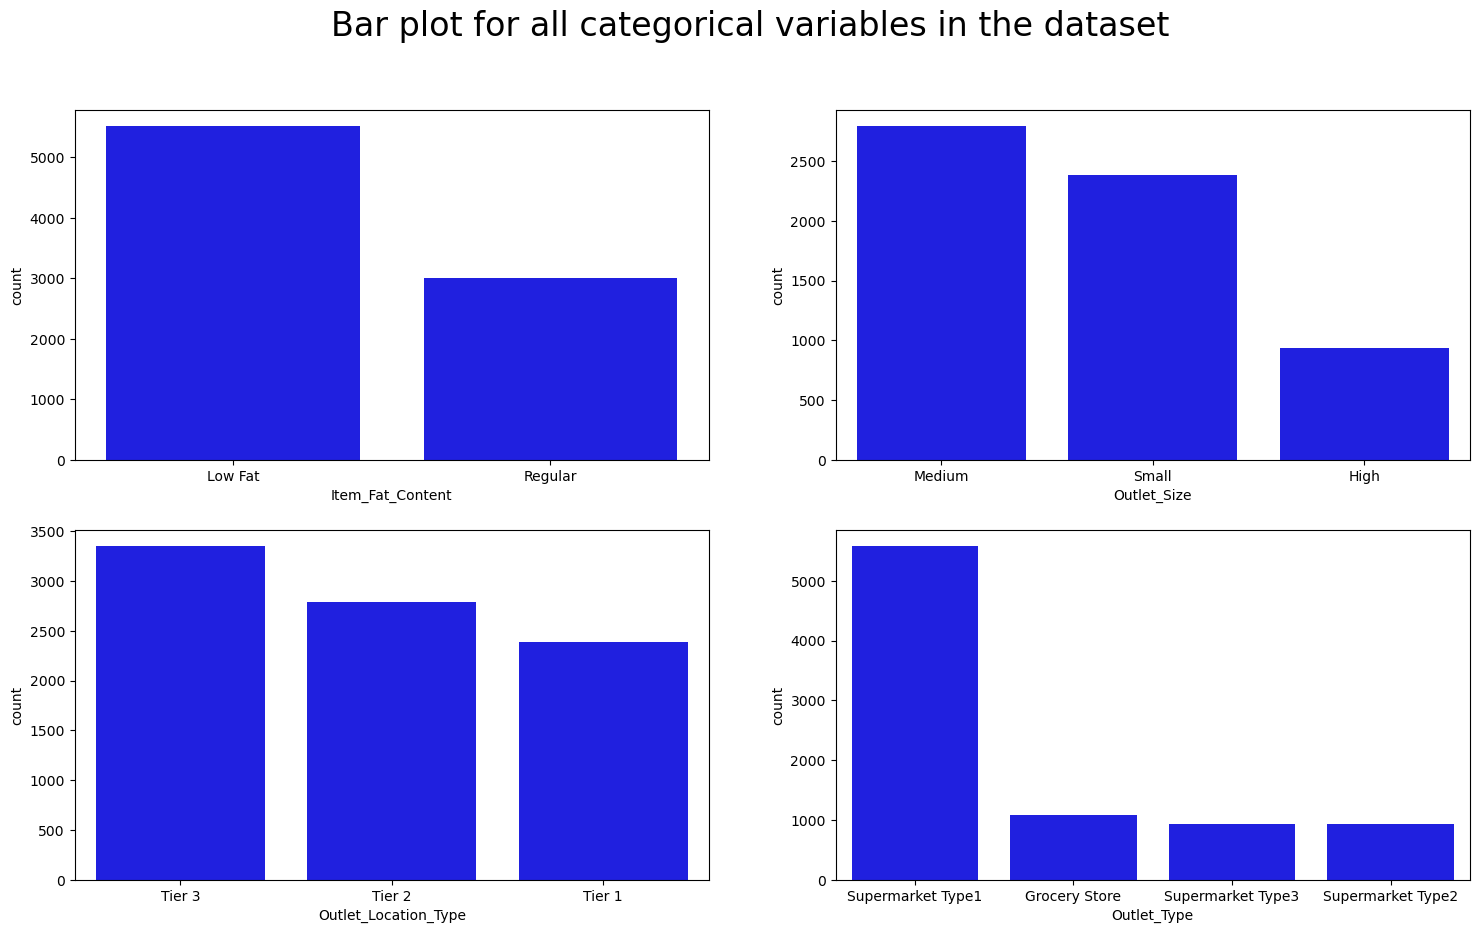

In [24]:
fig, axes = plt.subplots(2,2,figsize=(18,10))
fig.suptitle('Bar plot for all categorical variables in the dataset', fontsize = 24)
sns.countplot(ax = axes[0,0], x = 'Item_Fat_Content', data = train_df, color = 'blue',
              order = train_df['Item_Fat_Content'].value_counts().index)
sns.countplot(ax = axes[0,1], x = 'Outlet_Size', data = train_df, color = 'blue',
              order = train_df['Outlet_Size'].value_counts().index)
sns.countplot(ax = axes[1,0], x = 'Outlet_Location_Type', data = train_df, color = 'blue',
              order = train_df['Outlet_Location_Type'].value_counts().index)
sns.countplot(ax = axes[1,1], x = 'Outlet_Type', data = train_df, color = 'blue',
              order = train_df['Outlet_Type'].value_counts().index);

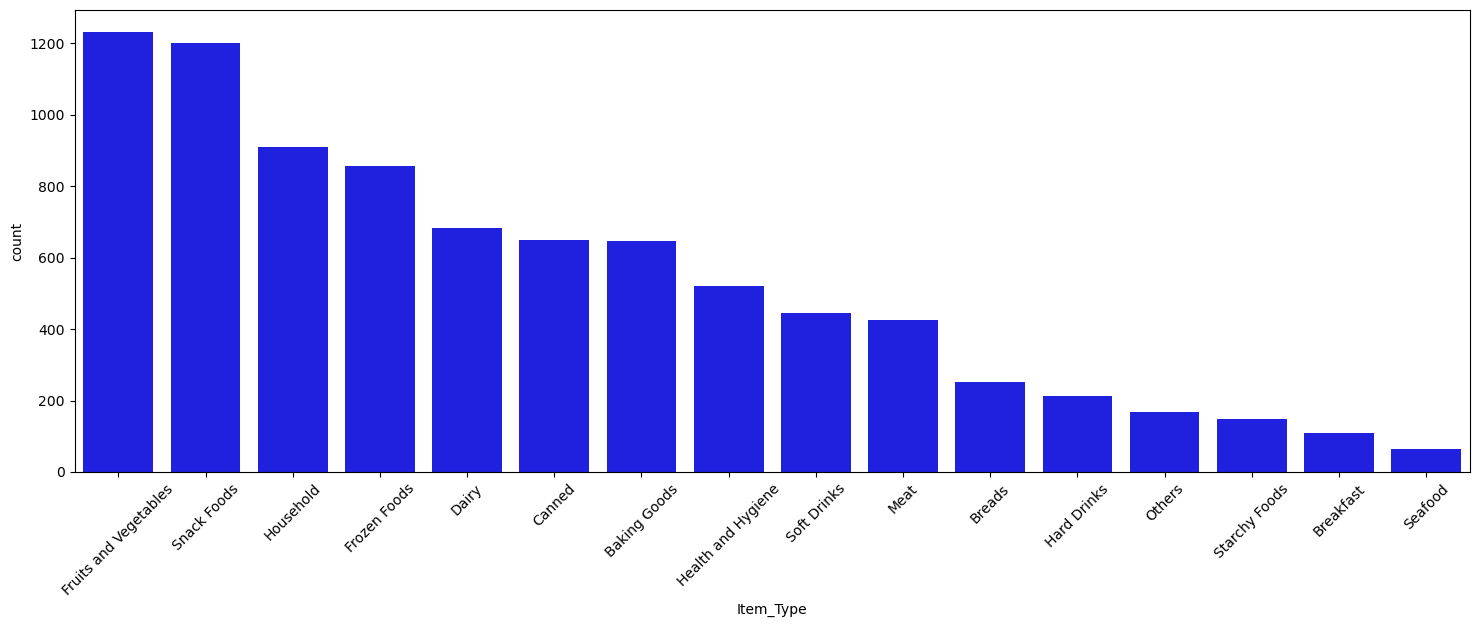

In [18]:
fig = plt.figure(figsize = (18,6))
sns.countplot(x = 'Item_Type', data = train_df, color = 'blue', order = train_df['Item_Type'].value_counts().index);
plt.xticks(rotation = 45);

In [20]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x == 'low fat' or x == 'LF' else x)
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].apply(lambda x: 'Regular' if x == 'reg' else x)

In [21]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x == 'low fat' or x == 'LF' else x)
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].apply(lambda x: 'Regular' if x == 'reg' else x)

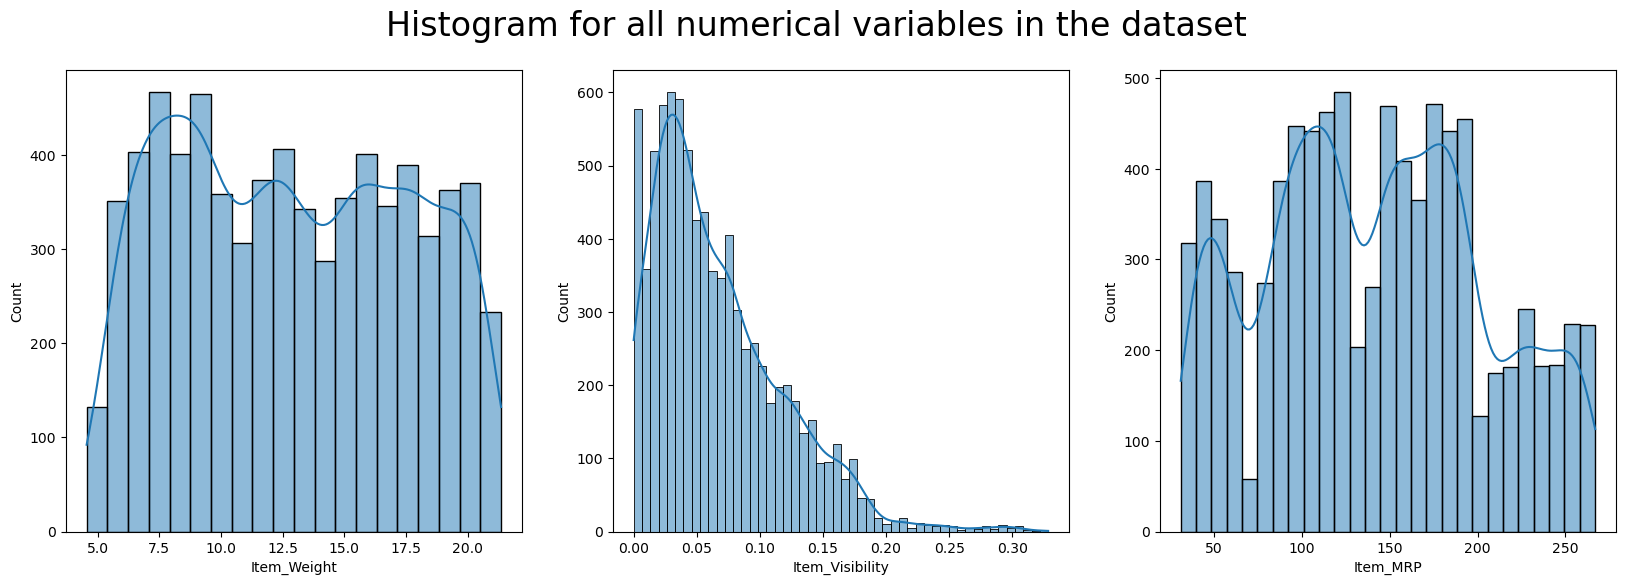

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Histogram for all numerical variables in the dataset', fontsize=24)
sns.histplot(x = 'Item_Weight', data = train_df, kde = True, ax = axes[0]);
sns.histplot(x = 'Item_Visibility', data = train_df, kde = True, ax = axes[1])
sns.histplot(x = 'Item_MRP', data = train_df, kde = True, ax = axes[2]);

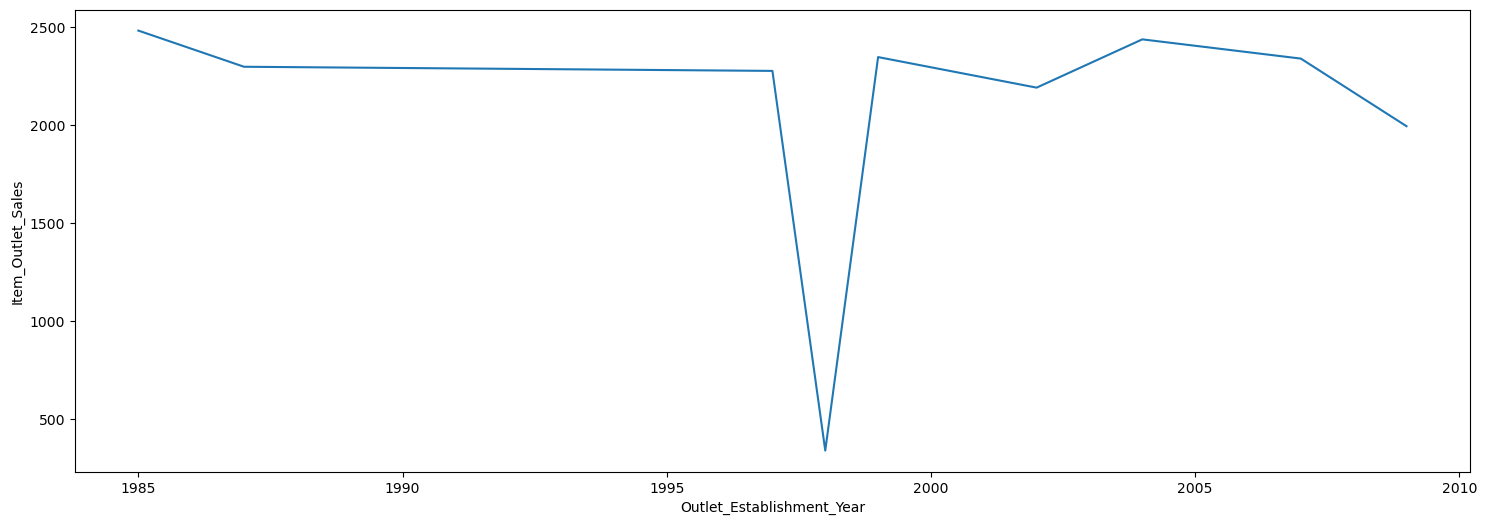

In [29]:
fig = plt.figure(figsize = (18, 6))
sns.lineplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = train_df, ci = None, estimator = 'mean');

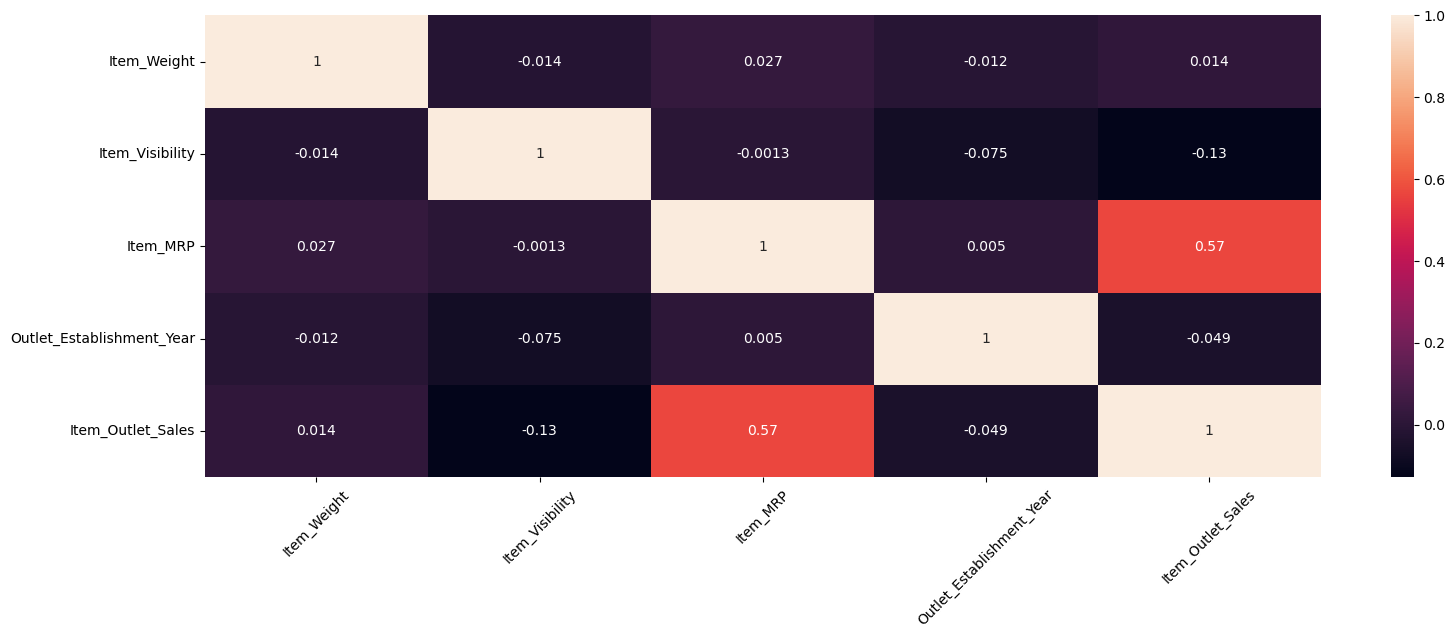

In [32]:
fig = plt.figure(figsize=(18,6))
sns.heatmap(train_df.corr(), annot=True);
plt.xticks(rotation=45);